In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.patches import Ellipse

In [2]:
solves=pd.read_csv('solves.csv')

In [3]:
solves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          997 non-null    int64  
 1   name                997 non-null    object 
 2   total_time          997 non-null    float64
 3   f2l_time            997 non-null    float64
 4   ll_time             997 non-null    float64
 5   cross+1_time        997 non-null    float64
 6   ols_time            997 non-null    float64
 7   pll_time            997 non-null    float64
 8   total_time_percent  997 non-null    float64
 9   f2l_time_percent    997 non-null    float64
 10  ll_time_percent     997 non-null    float64
 11  cross+1_percent     997 non-null    float64
 12  ols_percent         997 non-null    float64
 13  pll_percent         997 non-null    float64
 14  total_stm           997 non-null    float64
 15  f2l_stm             997 non-null    float64
 16  ll_stm  

In [4]:
palette1=['#001219',
 '#005F73',
 '#0A9396',
 '#94D2BD',
 '#E9D8A6',
 '#EE9B00',
 '#CA6702',
 '#BB3E03',
 '#AE2012',
 '#9B2226']
palette2=['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
palette3=['#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#FFFD98',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F0C929',
'#F2A840',
'#F2A840',
'#F2A840',
'#F2A840',
'#F2A840',
'#F2A840',
'#F2A840',
'#E58C10',
'#E58C10',
'#E58C10',
'#E58C10',
'#E58C10',
'#EC5732',
'#EC5732',
'#EC5732',
'#EA481F',
'#CD3813',
'#CD3813',
'#CD3813',
'#CD3813',
'#8F1300',
'#8F1300',
'#7A1000']
new_palette3=palette3[::-1]
palette4=['#0E043A', '#F71735', '#41EAD4', '#2B7EA1', '#F4772A','#F9CB40']
palette5=['#12263A','#413BA5','#06BCC1', '#DE2E2B', '#04F1C2', '#F78154']
palette6=['#001219',
 '#005F73',
 '#0A9396',
 '#94D2BD',
 '#E9D8A6',
 '#EE9B00',
 '#CA6702',
 '#BB3E03',
 '#AE2012',
 '#9B2226']


STATS BASED ON PEOPLE

In [5]:
solves.drop(131,inplace=True)

In [16]:
sns.set_style("whitegrid")

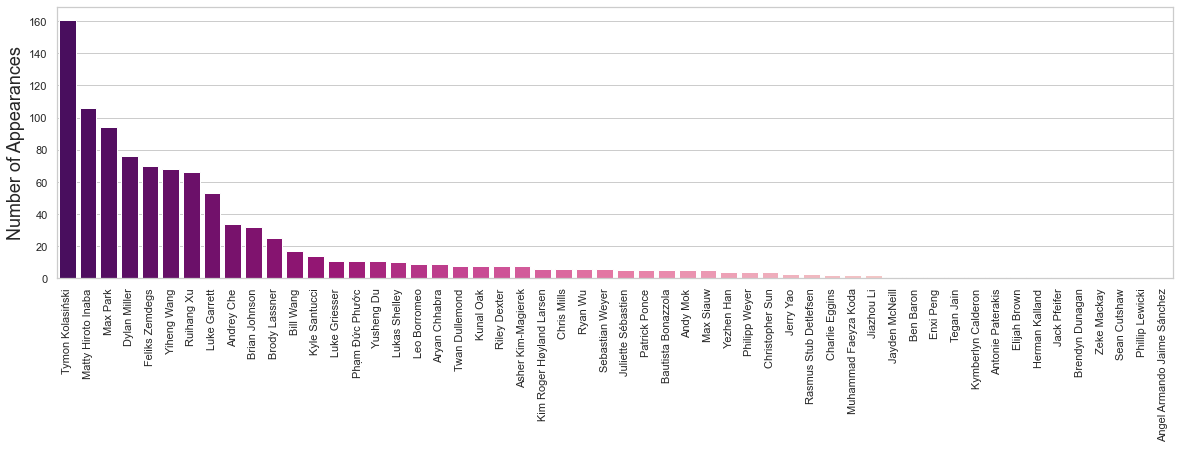

In [17]:
plt.figure(figsize=(20,5))
sns.set_context('notebook')
ax=sns.countplot(x='name',data=solves,order = solves['name'].value_counts().index,palette='RdPu_r')
plt.xticks(rotation=90)
ax.set_ylabel('Number of Appearances',fontsize=18)
ax.set_xlabel('')
plt.show()

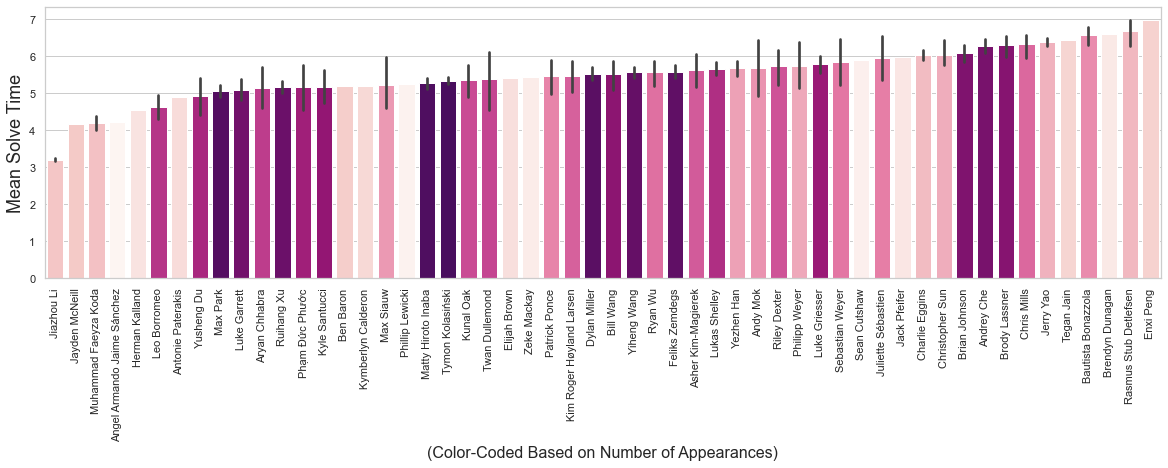

In [18]:
plt.figure(figsize=(20,5))
sns.set_context('notebook')
plt.xticks(rotation=90)
ax=sns.barplot(
    x='name',y='total_time',data=solves,
    order=solves.groupby('name').mean()['total_time'].sort_values().index,hue='name',
    hue_order=solves['name'].value_counts().index, palette='RdPu_r', dodge=False
)
ax.get_legend().remove()

ax.set_ylabel('Mean Solve Time',fontsize=18)
ax.set_xlabel('(Color-Coded Based on Number of Appearances)',fontsize=16)
plt.show()

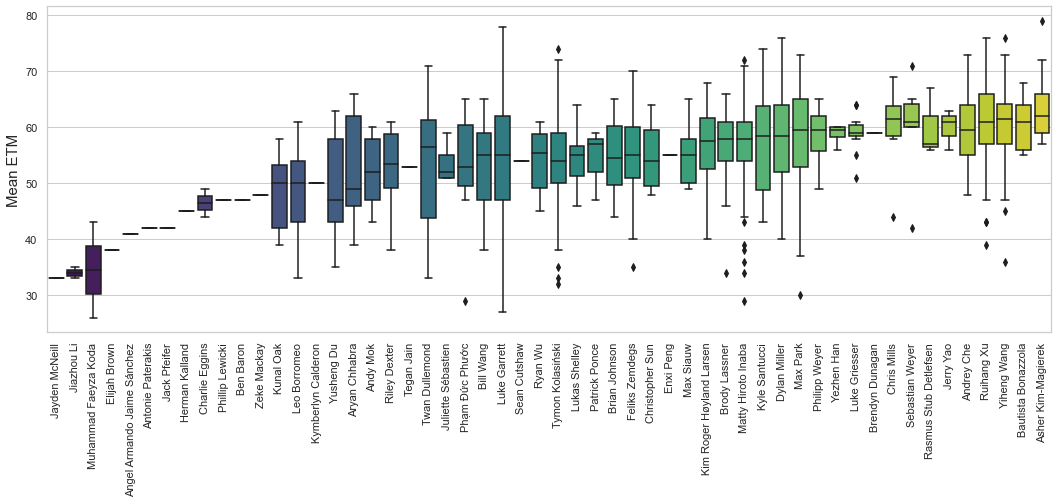

In [19]:
plt.figure(figsize=(18,6))
sns.set_context('notebook')
plt.xticks(rotation=90)
ax=sns.boxplot(x='name',y='total_etm',data=solves,order=solves.groupby('name').mean()['total_etm'].sort_values(ascending=True).index,palette='viridis')
ax.set_ylabel('Mean ETM',fontsize=15)
ax.set_xlabel('')
plt.show()

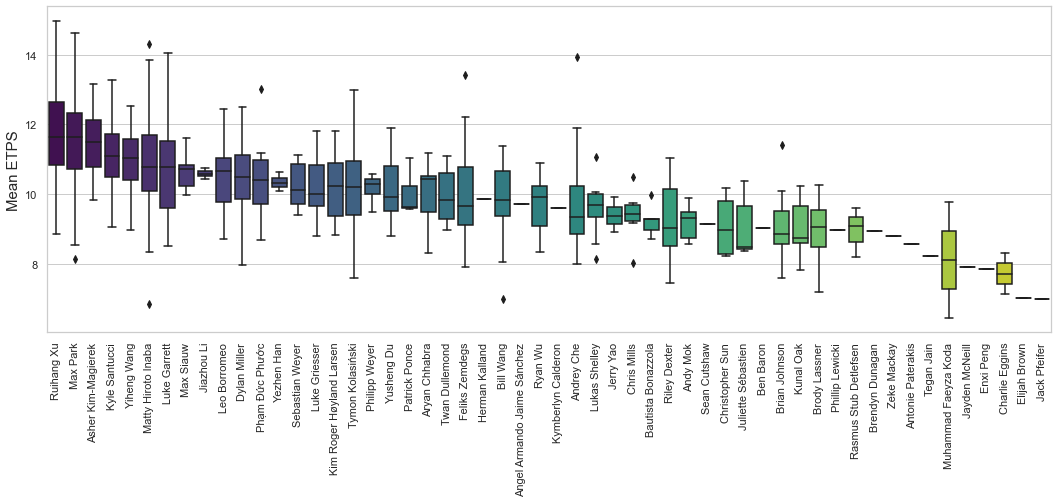

In [20]:
plt.figure(figsize=(18,6))
sns.set_context('notebook')
plt.xticks(rotation=90)
ax=sns.boxplot(x='name',y='total_etps',data=solves,order=solves.groupby('name').mean()['total_etps'].sort_values(ascending=False).index,palette='viridis')
ax.set_ylabel('Mean ETPS',fontsize=15)
ax.set_xlabel('')

plt.show()

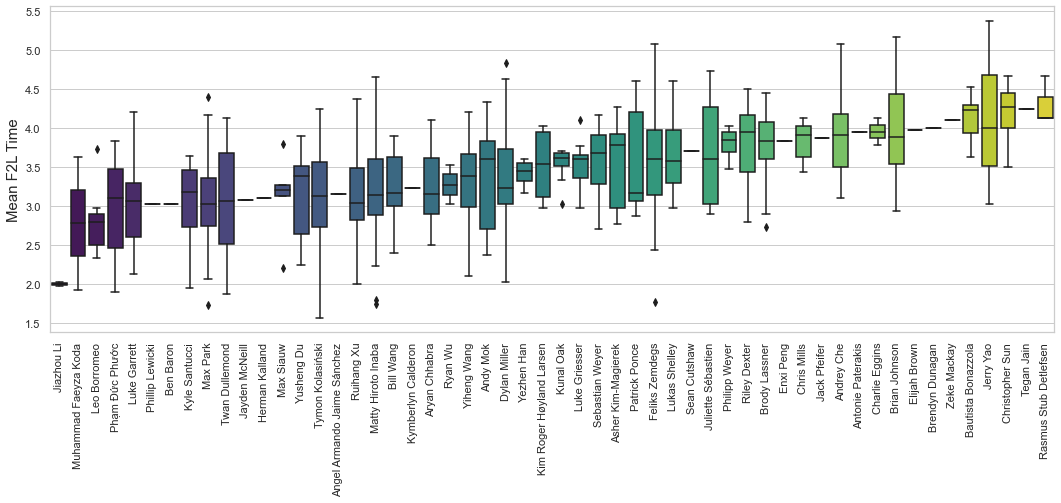

In [21]:
plt.figure(figsize=(18,6))
sns.set_context('notebook')
plt.xticks(rotation=90)
ax=sns.boxplot(x='name',y='f2l_time',data=solves,order=solves.groupby('name').mean()['f2l_time'].sort_values(ascending=True).index,palette='viridis')
ax.set_ylabel('Mean F2L Time',fontsize=15)
ax.set_xlabel('')
plt.show()

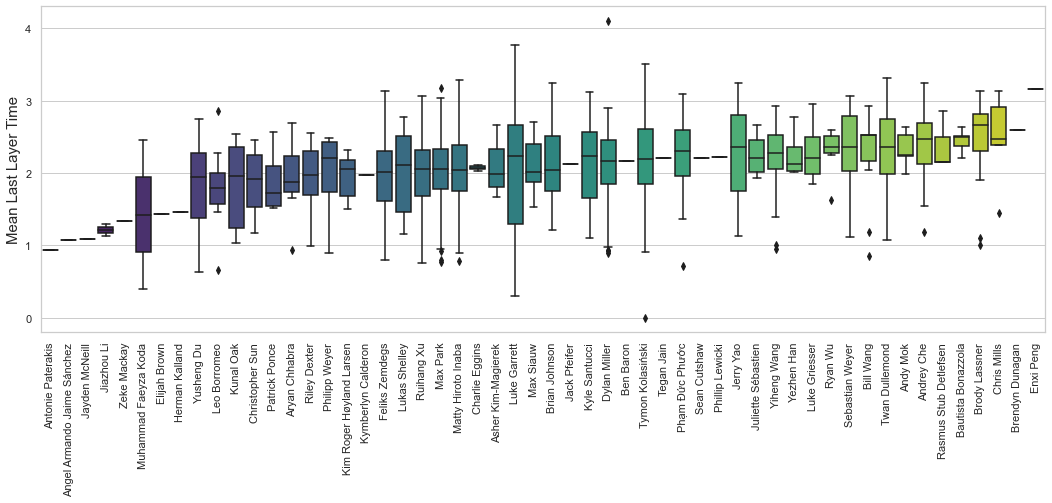

In [22]:
plt.figure(figsize=(18,6))
sns.set_context('notebook')
plt.xticks(rotation=90)
ax=sns.boxplot(x='name',y='ll_time',data=solves,order=solves.groupby('name').mean()['ll_time'].sort_values(ascending=True).index,palette='viridis')
ax.set_ylabel('Mean Last Layer Time',fontsize=15)
ax.set_xlabel('')
plt.show()

Text(0.5, 0, 'Number of Cross-Types')

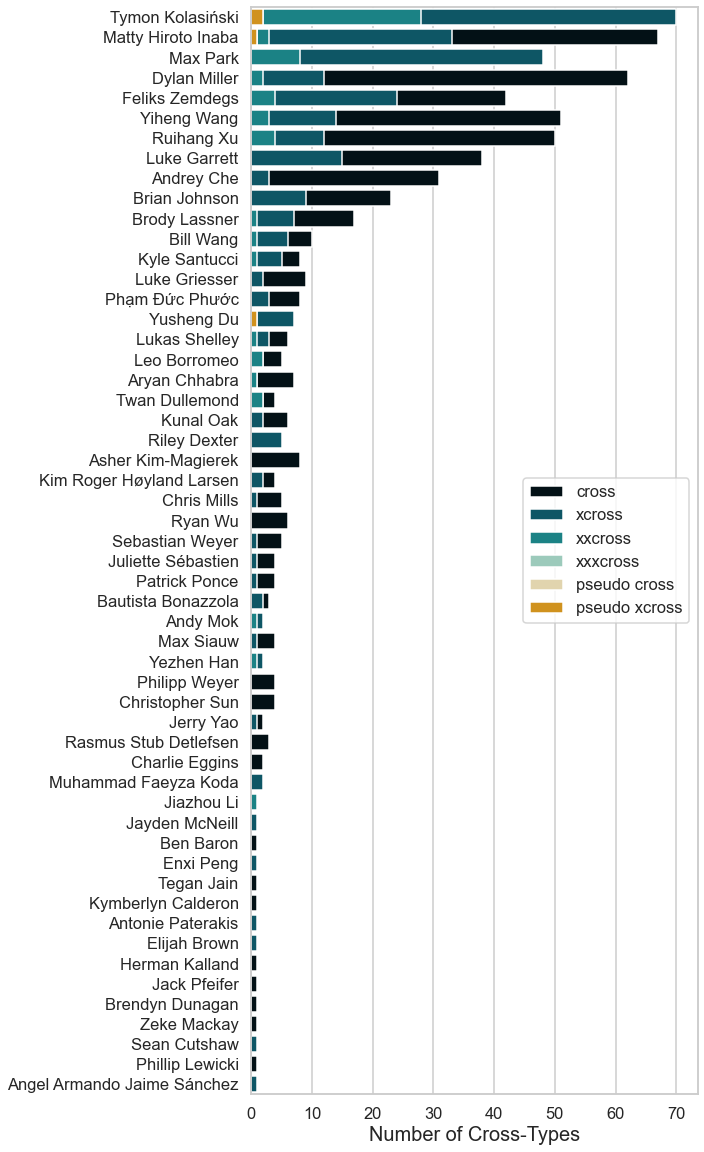

In [23]:
plt.figure(figsize=(8,20))
sns.set_context('talk')
ax=sns.countplot(y='name',data=solves,dodge=False,hue='cross_type',order = solves['name'].value_counts().index,palette=palette6,hue_order=['cross','xcross','xxcross','xxxcross', 'pseudo cross', 'pseudo xcross'])
plt.legend(loc='center right')
ax.set_ylabel('')
ax.set_xlabel('Number of Cross-Types',fontsize=20)


Text(0.5, 0, 'Use of ZBLL')

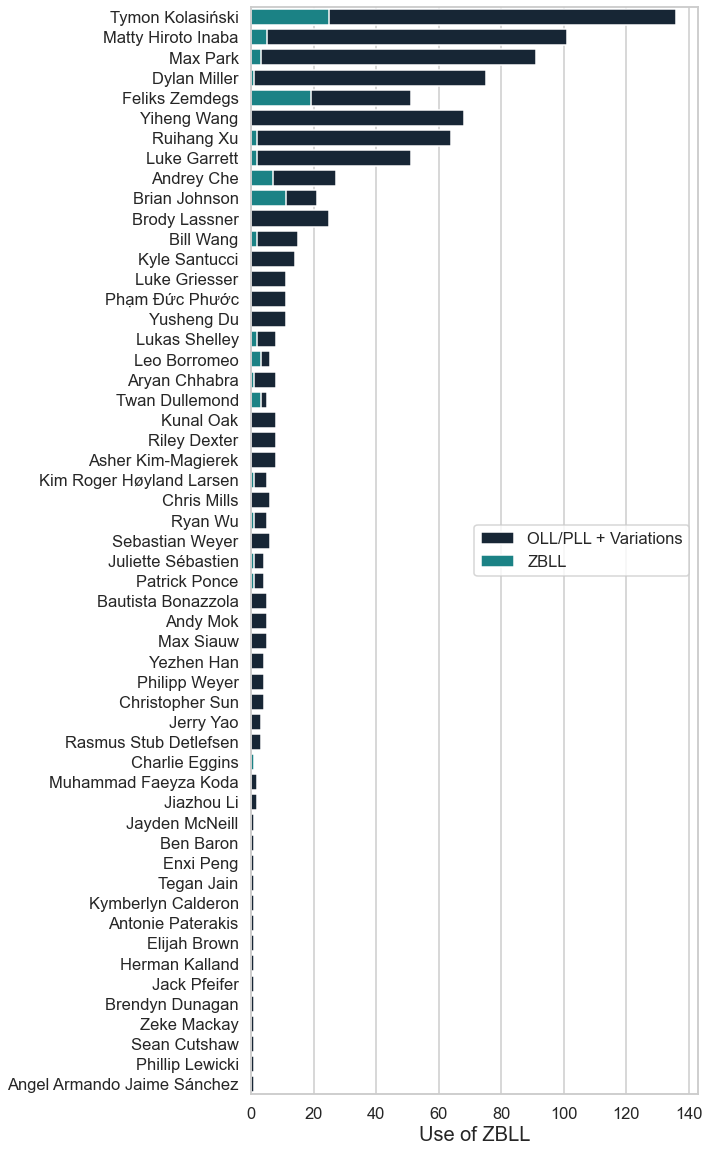

In [24]:
plt.figure(figsize=(8,20))
sns.set_context('talk')
ax=sns.countplot(y='name',data=solves,hue='zbll',order = solves['name'].value_counts().index,palette=[palette5[0],palette6[2]],dodge=False)
plt.legend(loc='center right',labels=['OLL/PLL + Variations','ZBLL'])
ax.set_ylabel('')
ax.set_xlabel('Use of ZBLL',fontsize=20)

Analysis of solve metrics

In [14]:
solves.head()

,Unnamed: 0,name,total_time,f2l_time,ll_time,cross+1_time,ols_time,pll_time,total_time_percent,f2l_time_percent,...,pll_etm,total_etps,f2l_etps,ll_etps,cross+1_etps,ols_etps,pll_etps,cross_type,zbll,num_steps
0,0,Patrick Ponce,4.59,3.07,1.52,1.30,1.10,0.82,100.0,66.9,...,1.0,10.24,12.38,5.92,10.77,14.55,1.22,cross,False,7.0
1,1,Luke Garrett,4.77,3.00,1.77,1.20,1.40,0.80,100.0,62.9,...,13.0,10.90,10.00,12.43,7.50,10.00,16.25,xcross,False,6.0
2,2,Ruihang Xu,4.58,2.87,1.71,0.80,1.30,1.01,100.0,62.7,...,16.0,14.41,13.59,15.79,12.50,15.38,15.84,cross,False,7.0
3,3,Aryan Chhabra,4.11,3.17,0.94,0.83,0.60,0.94,100.0,77.1,...,14.0,11.19,10.09,14.89,9.64,15.00,14.89,cross,False,6.0
4,4,Tymon Kolasiński,5.58,2.08,3.50,0.92,1.48,2.70,100.0,37.3,...,26.0,10.22,11.54,9.43,7.61,12.84,9.63,xxcross,False,5.0


In [15]:
solves.corr()['total_time'].sort_values(ascending=False)[1:].head(10)

f2l_time        0.743566
ll_time         0.683678
total_etm       0.647260
total_stm       0.630614
f2l_etm         0.496702
f2l_stm         0.481652
cross+1_time    0.460373
pll_time        0.450450
ll_etm          0.420141
ll_stm          0.414107
Name: total_time, dtype: float64

In [16]:
solves.corr()['total_time'].sort_values().head(10)

total_etps     -0.427394
total_stps     -0.425583
f2l_stps       -0.384141
f2l_etps       -0.375645
ols_etps       -0.290444
ols_stps       -0.288520
ll_etps        -0.235030
ll_stps        -0.233128
cross+1_etps   -0.207135
cross+1_stps   -0.206363
Name: total_time, dtype: float64

Text(0, 0.5, 'Count')

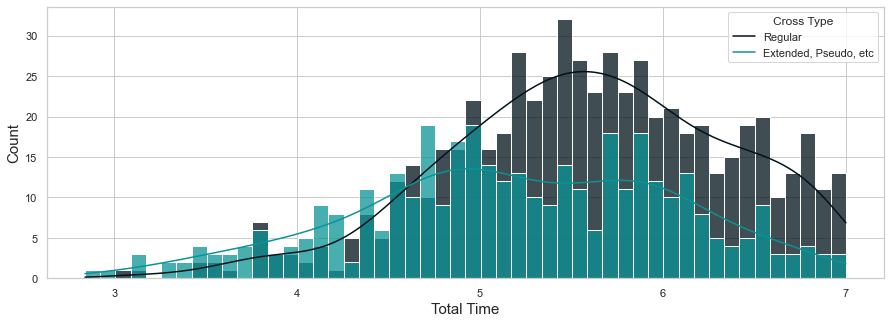

In [25]:
plt.figure(figsize=(15,5))
sns.set_context('notebook')
sns.histplot(x='total_time',data=solves,bins=50,hue=solves['cross_type']=='cross',palette=[palette6[2],palette1[0]],alpha=0.75,kde=True)
plt.legend(title='Cross Type',labels=['Regular','Extended, Pseudo, etc'])
plt.xlabel('Total Time',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [18]:
solves[solves['cross_type']=='cross']['total_time'].mean()

5.595889070146817

In [19]:
solves[solves['cross_type']!='cross']['total_time'].mean()

5.193159268929506

Text(0, 0.5, 'Total Time')

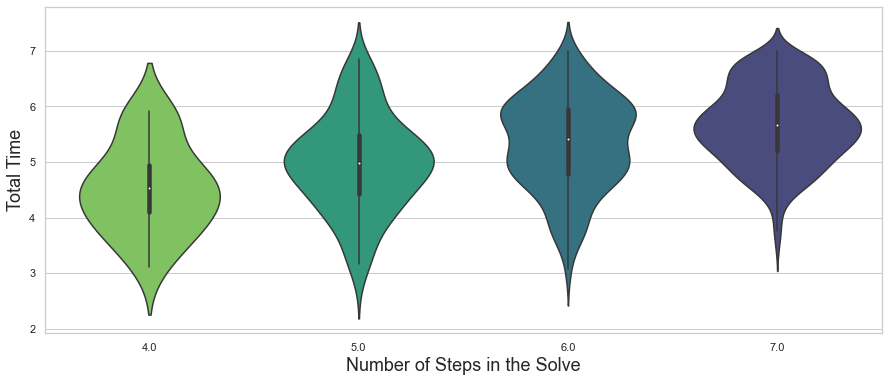

In [26]:
plt.figure(figsize=(15,6))
sns.violinplot(x='num_steps',y='total_time',data=solves,palette='viridis_r')
plt.xlabel('Number of Steps in the Solve',fontsize=18)
plt.ylabel('Total Time',fontsize=18)

In [27]:
solves.drop('Unnamed: 0',axis=1,inplace=True)

[Text(0, 0, 'Cross+1'), Text(0, 1, 'Last Layer'), Text(0, 2, 'F2L')]

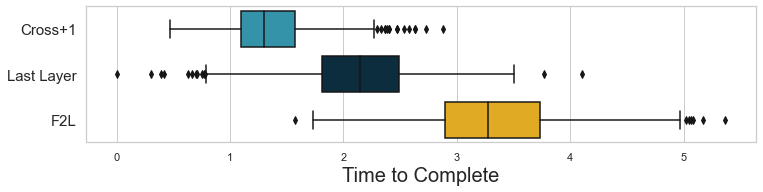

In [28]:
plt.figure(figsize=(12,2.5))
ax=sns.boxplot(y='variable',x='value',data=pd.melt(solves[['cross+1_time','ll_time','f2l_time']]),palette=palette2[1:])
ax.set_ylabel('',fontsize=20)
ax.set_xlabel('Time to Complete',fontsize=20)
ax.set_yticklabels(['Cross+1','Last Layer','F2L'],fontsize=15)

[Text(0, 0, 'Cross+1'), Text(0, 1, 'Last Layer'), Text(0, 2, 'F2L')]

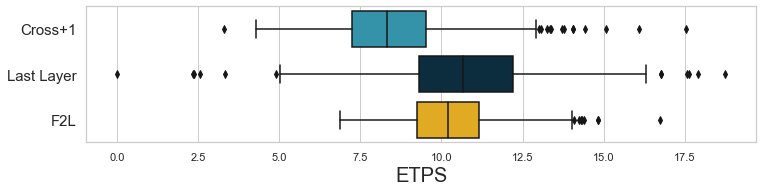

In [29]:
plt.figure(figsize=(12,2.5))
ax=sns.boxplot(y='variable',x='value',data=pd.melt(solves[['cross+1_etps','ll_etps','f2l_etps']]),palette=palette2[1:])
ax.set_ylabel('',fontsize=20)
ax.set_xlabel('ETPS',fontsize=20)
ax.set_yticklabels(['Cross+1','Last Layer','F2L'],fontsize=15)

[Text(0, 0, 'Cross+1'), Text(0, 1, 'Last Layer'), Text(0, 2, 'F2L')]

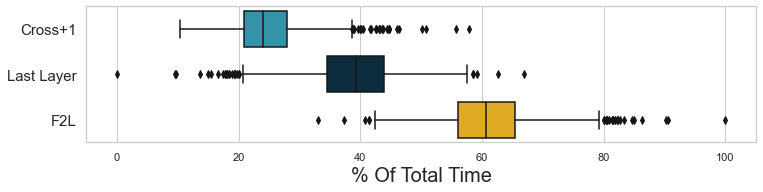

In [30]:
plt.figure(figsize=(12,2.5))
ax=sns.boxplot(y='variable',x='value',data=pd.melt(solves[['cross+1_percent','ll_time_percent','f2l_time_percent']]),palette=palette2[1:])
ax.set_ylabel('',fontsize=20)
ax.set_xlabel('% Of Total Time',fontsize=20)
ax.set_yticklabels(['Cross+1','Last Layer','F2L'],fontsize=15)

In [47]:
solves.corr()['f2l_time'].sort_values()

ll_time_percent      -0.514206
f2l_stps             -0.486795
f2l_etps             -0.473838
total_stps           -0.459185
total_etps           -0.444056
cross+1_stps         -0.250531
ols_stps             -0.245870
cross+1_etps         -0.243097
ols_etps             -0.238987
pll_percent          -0.230456
ll_etps              -0.183846
ll_stps              -0.182258
pll_etps             -0.129881
pll_stps             -0.129290
ll_etm               -0.102883
ll_stm               -0.102733
ols_percent          -0.096852
pll_etm              -0.072009
pll_stm              -0.071681
pll_time             -0.015973
ll_time               0.020417
zbll                  0.118437
ols_stm               0.132901
ols_etm               0.144376
cross+1_percent       0.146744
num_steps             0.219518
ols_time              0.276369
cross+1_stm           0.346095
total_stm             0.349369
cross+1_etm           0.354628
total_etm             0.377197
f2l_time_percent      0.515005
cross+1_

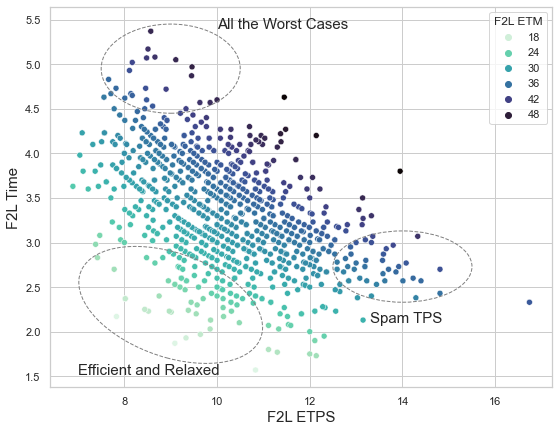

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
ax=sns.scatterplot(x='f2l_etps',y='f2l_time',data=solves,hue='f2l_etm',palette='mako_r')
plt.xlabel('F2L ETPS',fontsize=15)
plt.ylabel('F2L Time',fontsize=15)
plt.legend(title='F2L ETM')

ellipse1=Ellipse(xy=(9,2.3),width=4,height=1.2,angle=-8,fill=False,lw=1,ls='--',color='gray')
ellipse2=Ellipse(xy=(14,2.73),width=3,height=0.8,angle=0,fill=False,lw=1,ls='--',color='gray')
ellipse3=Ellipse(xy=(9,4.95),width=3,height=1,angle=0,fill=False,lw=1,ls='--',color='gray')

ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(ellipse3)

ax.annotate(text='Efficient and Relaxed',xy=(7,1.52),fontsize=15)
ax.annotate(text='Spam TPS',xy=(13.3,2.1),fontsize=15)
ax.annotate(text='All the Worst Cases',xy=(10,5.4),fontsize=15)

plt.show()

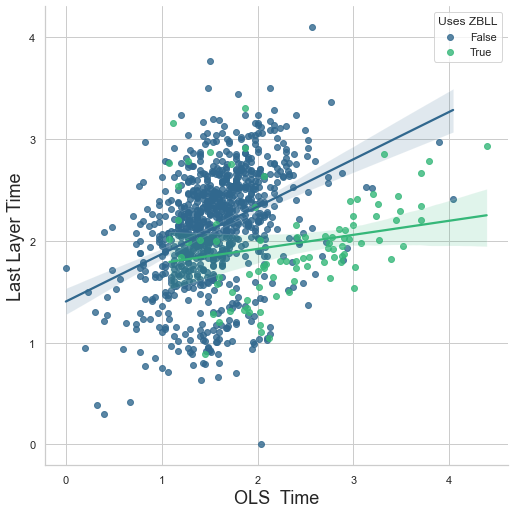

In [42]:
sns.lmplot(x='ols_time',y='ll_time',data=solves,hue='zbll',palette='viridis',height=7.2,legend=False,markers='o')
plt.xlabel('OLS  Time',fontsize=18)
plt.ylabel('Last Layer Time',fontsize=18)
plt.legend(title='Uses ZBLL')

In [265]:
solves.corr()['ll_time'].sort_values()

f2l_time_percent     -0.829330
cross+1_percent      -0.355718
ols_etps             -0.172956
ols_stps             -0.162603
total_etps           -0.153692
ll_etps              -0.150179
ll_stps              -0.149082
total_stps           -0.134530
ols_percent          -0.082494
zbll                 -0.081369
f2l_etps             -0.044167
cross+1_etps         -0.043894
f2l_stps             -0.042808
cross+1_stps         -0.034648
f2l_stm              -0.005669
f2l_etm              -0.004828
f2l_time              0.020417
cross+1_etm           0.057162
cross+1_stm           0.060841
cross+1_time          0.078096
ols_etm               0.206057
ols_stm               0.207126
pll_stps              0.226713
pll_etps              0.228508
num_steps             0.256817
ols_time              0.262122
total_etm             0.556601
pll_stm               0.559504
total_stm             0.562058
pll_etm               0.563679
pll_percent           0.564111
total_time            0.683678
pll_time

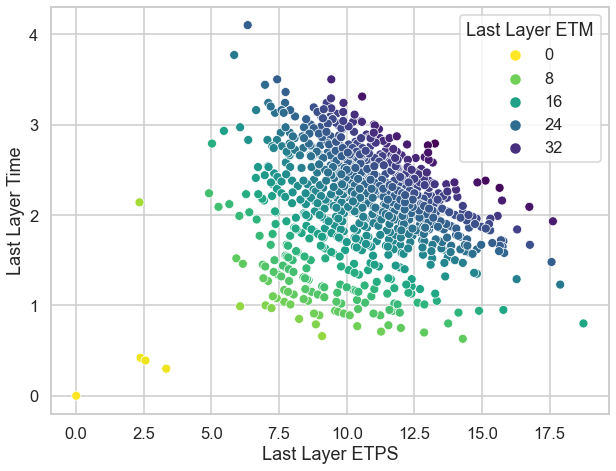

In [43]:
plt.figure(figsize=(10,7.5))
sns.set_context('talk')
ax=sns.scatterplot(x='ll_etps',y='ll_time',data=solves,hue='ll_etm',palette='viridis_r')
plt.xlabel('Last Layer ETPS',fontsize=18)
plt.ylabel('Last Layer Time',fontsize=18)
plt.legend(title='Last Layer ETM')